In [18]:
import pandas as pd
import shapely.geometry
import geopandas as gpd
import matplotlib.pyplot as plt

In [19]:
raw = pd.read_csv('UN5/20200305160727890_tiagocpaim@gmail.com_data.csv', index_col=0)

In [20]:
raw.columns

Index(['Target', 'Indicator', 'SeriesCode', 'SeriesDescription', 'GeoAreaCode',
       'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail', ' UpperBound',
       ' LowerBound', ' BasePeriod', ' Source', 'FootNote', 'Nature', 'Units',
       '[Age]', '[Location]', '[Reporting Type]', '[Sex]'],
      dtype='object')

In [21]:
raw.dtypes

Target                object
Indicator             object
SeriesCode            object
SeriesDescription     object
GeoAreaCode            int64
GeoAreaName           object
TimePeriod             int64
Value                 object
Time_Detail           object
 UpperBound          float64
 LowerBound          float64
 BasePeriod          float64
 Source               object
FootNote              object
Nature                object
Units                 object
[Age]                 object
[Location]            object
[Reporting Type]      object
[Sex]                 object
dtype: object

In [22]:
raw.shape

(24826, 20)

In [23]:
raw.Indicator.unique()

array(['5.1.1', '5.2.1', '5.3.1', '5.3.2', '5.4.1', '5.5.2', '5.5.1',
       '5.6.1', '5.b.1', '5.c.1'], dtype=object)

In [24]:
raw.loc[(raw.Indicator == '5.2.1') & (raw.GeoAreaName == 'Portugal')]#, ['Value', 'SeriesCode', 'SeriesDescription', 'Source', 'FootNote']]

,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,UpperBound,LowerBound,BasePeriod,Source,FootNote,Nature,Units,[Age],[Location],[Reporting Type],[Sex]
Goal,,,,,,,,,,,,,,,,,,,,
5,5.2,5.2.1,VC_VAW_MARR,Proportion of ever-partnered women and girls s...,620,Portugal,2012,6.0,2012,NaN,NaN,NaN,calculated by FRA based on available country d...,Women aged 18-74; definition of physical and s...,C,PERCENT,18-50,NaN,G,FEMALE


In [25]:
raw.groupby('Indicator').count().loc[:, 'Target']

Indicator
5.1.1      216
5.2.1      577
5.3.1      356
5.3.2       37
5.4.1     6296
5.5.1    13776
5.5.2     2747
5.6.1      339
5.b.1      406
5.c.1       76
Name: Target, dtype: int64

In [26]:
file = raw.groupby('SeriesDescription').agg({'Indicator': 'unique'})

In [27]:
file.to_csv('UN5/UN_Indicators_descriptions')

In [125]:
pt = gpd.read_file('PRT_adm2.shp')

In [126]:
pt = pt.loc[pt.TYPE_1 != 'Regiões autônoma']

AttributeError: 'GeoDataFrame' object has no attribute 'TYPE_1'

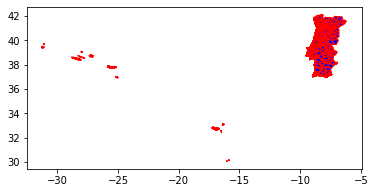

In [127]:
pt.plot(edgecolor = 'red', facecolor = 'Blue')
plt.ax = ('off')

In [31]:
file

,Indicator
SeriesDescription,
"Legal frameworks that promote, enforce and monitor gender equality (percentage of achievement, 0 - 100) -- Area 2: violence against women",[5.1.1]
"Legal frameworks that promote, enforce and monitor gender equality (percentage of achievement, 0 - 100) -- Area 1: overarching legal frameworks and public life",[5.1.1]
"Legal frameworks that promote, enforce and monitor gender equality (percentage of achievement, 0 - 100) -- Area 3: employment and economic benefits",[5.1.1]
"Legal frameworks that promote, enforce and monitor gender equality (percentage of achievement, 0 - 100) -- Area 4: marriage and family",[5.1.1]
Number of seats held by women in national parliaments (number),[5.5.1]
Number of seats in national parliaments (number),[5.5.1]
Proportion of countries with systems to track and make public allocations for gender equality and women's empowerment (%),[5.c.1]
Proportion of elected seats held by women in deliberative bodies of local government (%),[5.5.1]
"Proportion of ever-partnered women and girls subjected to physical and/or sexual violence by a current or former intimate partner in the previous 12 months, by age (%)",[5.2.1]


In [69]:
indicators = raw.loc[raw.Indicator == '5.4.1']

In [70]:
len(indicators.GeoAreaName.unique())

91

In [71]:
indicators.loc[indicators.SeriesCode == 'SL_DOM_TSPDCW'].shape

(2026, 20)

In [72]:
indicators.loc[indicators.SeriesCode == 'SL_DOM_TSPDDC'].shape

(2053, 20)

In [73]:
indicators.loc[indicators.SeriesCode == 'SL_DOM_TSPD'].shape

(2217, 20)

In [74]:
### The series have a different ammount of data points

In [75]:
filtered = indicators.loc[indicators.SeriesCode == 'SL_DOM_TSPDDC']

In [76]:
filtered.isna().sum()

Target                  0
Indicator               0
SeriesCode              0
SeriesDescription       0
GeoAreaCode             0
GeoAreaName             0
TimePeriod              0
Value                   0
Time_Detail             0
 UpperBound          2053
 LowerBound          2053
 BasePeriod          2053
 Source                 0
FootNote             1258
Nature                  0
Units                   0
[Age]                   0
[Location]              0
[Reporting Type]        0
[Sex]                   0
dtype: int64

In [77]:
filtered.shape

(2053, 20)

In [83]:
filtered['[Sex]'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [85]:
filtered.GeoAreaName.unique()

array(['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'Armenia', 'Belgium', 'Bhutan', 'Brazil', 'Bulgaria', 'Belarus',
       'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Ethiopia', 'Estonia', 'Fiji', 'Finland', 'France',
       'State of Palestine', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Honduras', 'China, Hong Kong Special Administrative Region',
       'Hungary', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland',
       'Italy', 'Japan', 'Kazakhstan', 'Republic of Korea', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Latvia', 'Liberia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritius',
       'Mexico', 'Mongolia', 'Republic of Moldova', 'Oman', 'Netherlands',
       'New Zealand', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru',
       'Poland', 'Portugal', 'Qatar', 'Réunion', 'Romania',
       'Russian Federation', 'Serbia', 'S

In [86]:
filtered.columns

Index(['Target', 'Indicator', 'SeriesCode', 'SeriesDescription', 'GeoAreaCode',
       'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail', ' UpperBound',
       ' LowerBound', ' BasePeriod', ' Source', 'FootNote', 'Nature', 'Units',
       '[Age]', '[Location]', '[Reporting Type]', '[Sex]'],
      dtype='object')

In [ ]:
filtered.Value = filtered.Value.astype(float)

In [98]:
#filtered.groupby('GeoAreaName').agg({'Value':'mean'})

In [100]:
filtered.Nature.unique()
## Know what Nature means

array(['CA', 'C'], dtype=object)

In [102]:
filtered.Units.unique()
##drop this

array(['PERCENT'], dtype=object)

In [108]:
len(filtered[' Source'].unique())
## do we need to keep our data source?

120

In [118]:
filtered['[Location]'].unique()
## we only have rural/urban breakdown or total

array(['ALLAREA', 'RURAL', 'URBAN'], dtype=object)

In [121]:
filtered.Nature.value_counts()
## dafuq is this

C     1828
CA     225
Name: Nature, dtype: int64

In [123]:
filtered['[Age]'].unique()

array(['65+', '10+', '12+', '15-24', '15+', '25-44', '55-64', '45-54',
       'ALLAGE', '20-74', '12-24', '65-74', '75-84', '85+', '25-34',
       '35-44', '45-64', '15-64', '12-14', '16+', '20+', '20-64', '20-24',
       '6+', '10-14', '5+', '14+'], dtype=object)

In [128]:
filtered.columns

Index(['Target', 'Indicator', 'SeriesCode', 'SeriesDescription', 'GeoAreaCode',
       'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail', ' UpperBound',
       ' LowerBound', ' BasePeriod', ' Source', 'FootNote', 'Nature', 'Units',
       '[Age]', '[Location]', '[Reporting Type]', '[Sex]'],
      dtype='object')

In [174]:
column_renamer = {'SeriesDescription' : 'series_description', 'GeoAreaName' : 'country',
                  'TimePeriod': 'year', 'Value': 'value', 'Source': 'source', 'Nature':'nature', 
                  '[Age]': 'age', '[Location]': 'location', '[Sex]': 'sex', }

In [143]:
times = filtered.loc[:,['Time_Detail', 'TimePeriod']]

In [149]:
sum(times.Time_Detail.astype(int) == times.TimePeriod) == times.shape[0]

True

In [164]:
filtered.Nature.unique()

array(['CA', 'C'], dtype=object)

In [165]:
filtered.Nature.isna().sum()/filtered.shape[0]

0.0

In [163]:
filtered.FootNote.value_counts()

Unpaid domestic work might include small amount of time spent on production of goods for own final use.                                                                                                                                                                                                                                                         328
Travel related to unpaid domestic work is not included.                                                                                                                                                                                                                                                                                                         160
Unpaid domestic work might include small amount of time spent on production of goods for own final use. Travel related to unpaid domestic work is not included.                                                                                                                                 

In [167]:
filtered.Nature.value_counts()

C     1828
CA     225
Name: Nature, dtype: int64

In [170]:
filtered.groupby('Nature').agg('mean')

,GeoAreaCode,TimePeriod,Value,UpperBound,LowerBound,BasePeriod
Nature,,,,,,
C,481.945295,2010.873085,10.684667,NaN,NaN,NaN
CA,400.244444,2009.902222,10.040779,NaN,NaN,NaN


In [173]:
filtered.loc[filtered.Nature == 'CA', '[Location]'].value_counts()

ALLAREA    201
URBAN       12
RURAL       12
Name: [Location], dtype: int64

In [179]:
filtered = filtered.loc[:, [x for x in column_renamer.keys()]]

In [181]:
filtered.rename(columns=column_renamer, inplace = True)

In [184]:
filtered

array(['MALE', 'FEMALE'], dtype=object)

In [185]:
filtered.to_csv('UN5/filtered_dataset')